# Clasificador de la calidad de los Vinos con KNN

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

from sklearn.datasets import make_regression
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Modificacion de nombres de columnas

df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Verificacion de duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)
print("Se observaron 240 duplicados; por lo que, se procede a eliminarlos")

240
Se observaron 240 duplicados; por lo que, se procede a eliminarlos


In [6]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

# Se resetea el data set luego de eliminarlos
df = df.reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


Una vez eliminado las filas duplicadas, la base de datos tiene 1359 tipos de vino y 12 columnas.

In [8]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Variable Objetivo es quality . Se verifican los datos

df.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

Analisis Univariable

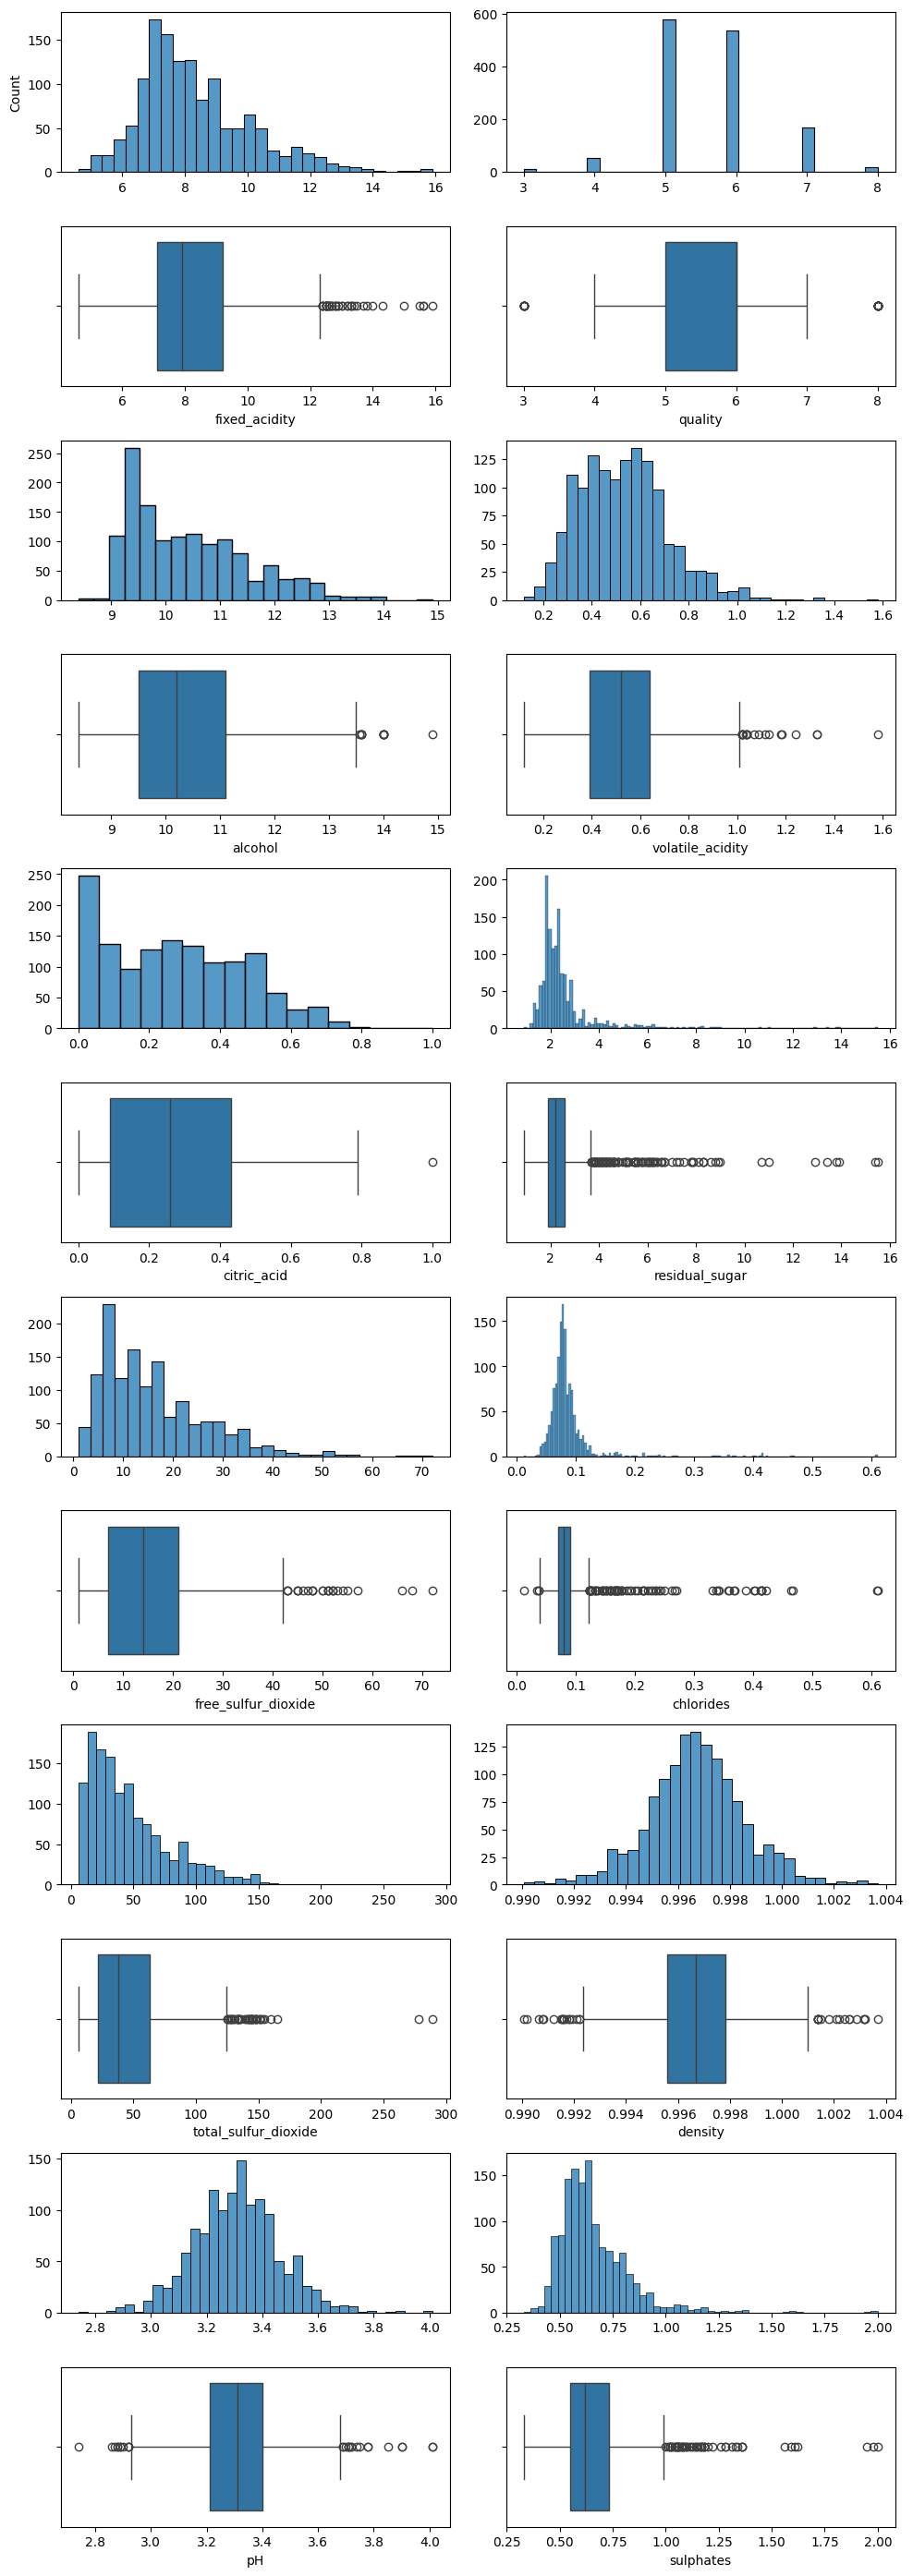

Todas la variables tienen outliers.


In [10]:
# Visualizacion de la distribucion de cada variable y sus outliers

fig, axes = plt.subplots(12, 2, figsize=(10, 28), gridspec_kw={'height_ratios': [1]*12})

# Histogramas y diagramas de caja de Variables numéricas

sns.histplot(ax=axes[0, 0], data=df, x="fixed_acidity").set(xlabel=None)
sns.boxplot(ax=axes[1, 0], data=df, x="fixed_acidity")

sns.histplot(ax=axes[0, 1], data=df, x="quality").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 1], data=df, x="quality")

sns.histplot(ax=axes[2, 0], data=df, x="alcohol").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 0], data=df, x="alcohol")

sns.histplot(ax=axes[2, 1], data=df, x="volatile_acidity").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 1], data=df, x="volatile_acidity")

sns.histplot(ax=axes[4, 0], data=df, x="citric_acid").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 0], data=df, x="citric_acid")

sns.histplot(ax=axes[4, 1], data=df, x="residual_sugar").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 1], data=df, x="residual_sugar")

sns.histplot(ax=axes[6, 0], data=df, x="free_sulfur_dioxide").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[7, 0], data=df, x="free_sulfur_dioxide")

sns.histplot(ax=axes[6, 1], data=df, x="chlorides").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[7, 1], data=df, x="chlorides")

sns.histplot(ax=axes[8, 0], data=df, x="total_sulfur_dioxide").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[9, 0], data=df, x="total_sulfur_dioxide")

sns.histplot(ax=axes[8, 1], data=df, x="density").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[9, 1], data=df, x="density")

sns.histplot(ax=axes[10, 0], data=df, x="pH").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[11, 0], data=df, x="pH")

sns.histplot(ax=axes[10, 1], data=df, x="sulphates").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[11, 1], data=df, x="sulphates")

plt.tight_layout()
plt.show()

print("Todas la variables tienen outliers.")

In [11]:
# Se establece solo 3 clases de las 9 existentes
map_clases = {
    1: 0,
    2: 0,
    3: 0,
    4: 1,
    5: 1,
    6: 1,
    7: 2,
    8: 2,
    9: 2
}

# Crear nueva columna 'label' con las clases recodificadas
df['label'] = df['quality'].map(map_clases)

# Verificar
print(df[['quality', 'label']].head(10))

   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        7      2
7        7      2
8        5      1
9        5      1


La variable Label consiste ahora de 3 clases:

0 = Baja calidad

1 = Calidad media

2 = Alta calidad

In [12]:
df = df.drop(columns=['quality'])

df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [13]:
# Eliminacion de Outliers

df_temp = df.copy() # se crea una copia del dataframe original 

#fixed_acidity
# Filtrar valores de fixed_acidity (hasta 12.3)
fixed_acidity_so = (df['fixed_acidity'] <= 12.3)

#Alcohol
# Filtrar valores de alcohol (hasta 13.5)
alcohol_so = (df['alcohol'] <= 13.5)

#Volatile_acidity
# Filtrar valores de volatile_acidity (hasta 1)
volatile_acidity_so = (df['volatile_acidity'] <= 1)

#residual_sugar
# Filtrar valores de residual_sugar (hasta 4)
residual_sugar_so = (df['residual_sugar'] <= 4)

#free_sulfur_dioxide
# Filtrar valores de free_sulfur_dioxide (hasta 4)
free_sulfur_dioxide_so = (df['free_sulfur_dioxide'] <= 41)

#chlorides	
# Filtrar valores de chlorides (de 0.08 a 0.15 )
chlorides_so = (df['chlorides'] >= 0.08) & (df['chlorides'] <= 0.15)

#total_sulfur_dioxide	
# Filtrar valores de total_sulfur_dioxide (hasta 200)
total_sulfur_dioxide_so = (df['total_sulfur_dioxide'] <= 200)

#density
# Filtrar valores de density (de 0.993 a 1.002 )
density_so = (df['density'] >= 0.993) & (df['density'] <= 1.002)

#pH
# Filtrar valores de ph (2.9 a 4.05)
pH_so = (df['pH'] >=2.5) & (df['pH'] <=4.05)

#sulphates
# Filtrar valores de sulphates (hasta 1)
sulphates_so = (df['sulphates'] <= 1) 

# Agregar columnas al df_temp
df_temp["fixed_acidity_so"] = fixed_acidity_so
df_temp["alcohol_so"] = alcohol_so
df_temp["volatile_acidity_so"] = volatile_acidity_so
df_temp["residual_sugar_so"] = residual_sugar_so
df_temp["free_sulfur_dioxide_so"] = free_sulfur_dioxide_so
df_temp["chlorides_so"] = chlorides_so
df_temp["total_sulfur_dioxide_so"] = total_sulfur_dioxide_so
df_temp["density_so"] = density_so
df_temp["pH_so"] = pH_so
df_temp["sulphates_so"] = sulphates_so

# Crear df_filtrado eliminando columnas antiguas
columnas_antiguas = ["fixed_acidity", "alcohol", "volatile_acidity", "residual_sugar","free_sulfur_dioxide", "chlorides", "total_sulfur_dioxide","density", "pH", "sulphates"]

df_filtrado = df_temp.drop(columns=columnas_antiguas)

print(df_filtrado.shape)
df_filtrado.head()



(1359, 12)


,citric_acid,label,fixed_acidity_so,alcohol_so,volatile_acidity_so,residual_sugar_so,free_sulfur_dioxide_so,chlorides_so,total_sulfur_dioxide_so,density_so,pH_so,sulphates_so
0,0.00,1,True,True,True,True,True,False,True,True,True,True
1,0.00,1,True,True,True,True,True,True,True,True,True,True
2,0.04,1,True,True,True,True,True,True,True,True,True,True
3,0.56,1,True,True,True,True,True,False,True,True,True,True
4,0.00,1,True,True,True,True,True,False,True,True,True,True


In [14]:
df_filtrado.columns

Index(['citric_acid', 'label', 'fixed_acidity_so', 'alcohol_so',
       'volatile_acidity_so', 'residual_sugar_so', 'free_sulfur_dioxide_so',
       'chlorides_so', 'total_sulfur_dioxide_so', 'density_so', 'pH_so',
       'sulphates_so'],
      dtype='object')

Se establecen los limites de 10 variables que se ha visto tienen outliers
Se crea un dataframe nuevo solo con las variables sin outliers
Finalmente no se considera usar el df con limites de los outliers porque afecta al resultado del modelo de regresion elegido

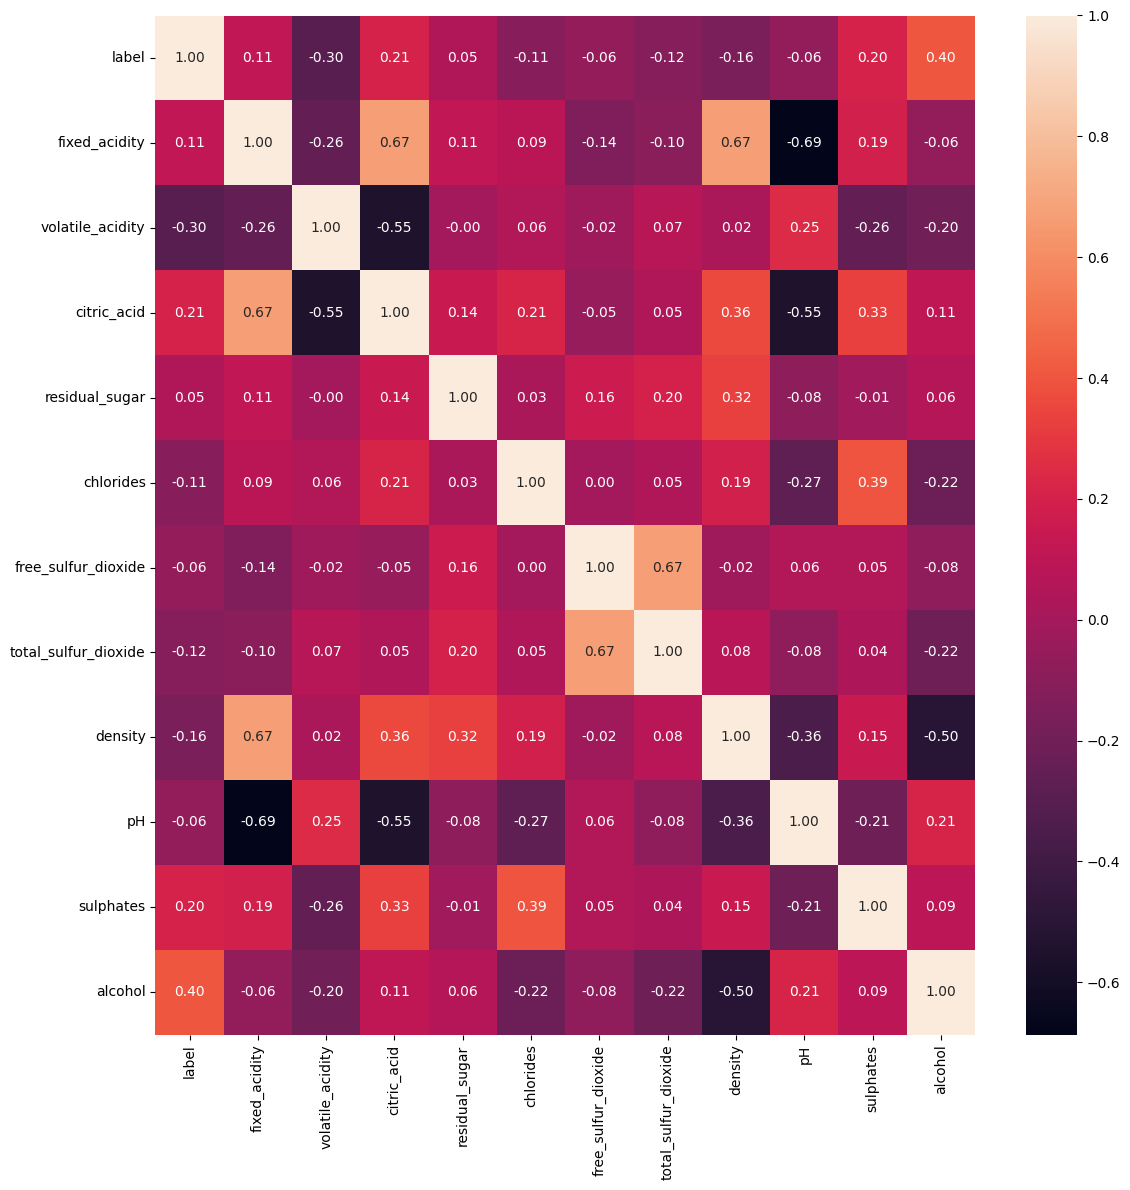

In [15]:
#ANALISIS MULTIVARIANTE - Mapa de calor

fig, axes = plt.subplots(figsize = (12,12))

sns.heatmap(df[['label','fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

El mapa de calor, realizado con las varaibles con outliers,  muestra correlacion entre las siguientes variables:

1. 0.69 entre el pH y Fixed Acidity
2. 0.55 entre pH y acido citrico
3. 0.50 entre alcohol y densidad
4. 0.55 entre acido citrico  y volatile_acidity
5. 0.67 dencidad y fixed acidity 

En general existe un correlacion entre las variables relacionados con la asidez, alcohol , densidad y ph del vino

# Modelo KNN

Division de Datos

In [16]:
#Division de Datos

X = df.drop("label", axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
865,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1289,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
394,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
731,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
54,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


Escalado de variables numericas

In [17]:
#ESCALADO 
variables_numericas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',	'pH', 'sulphates', 'alcohol'] #variables con outliers
#variables_numericas_so = ['fixed_acidity_so', 'volatile_acidity_so', 'citric_acid','residual_sugar_so', 'chlorides_so', 'free_sulfur_dioxide_so','total_sulfur_dioxide_so', 'density_so', 'pH_so', 'sulphates_so', 'alcohol_so']

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# aplico el escalador en train y test
X_train_num_scal = scaler.transform(X_train[variables_numericas])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = variables_numericas)

X_test_num_scal = scaler.transform(X_test[variables_numericas])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = variables_numericas)

X_train_num_scal.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
865,0.351623,-0.828323,0.648771,-0.238440,-0.411606,-0.362070,-0.566298,-0.986612,-0.259822,0.519851,1.984240
1289,-0.981548,0.965891,-0.989833,0.054589,0.312800,-0.168479,-0.596342,-0.025508,0.857267,-0.458489,-0.215867
394,-0.865620,0.180922,-1.245865,-0.604727,-0.106593,0.218703,-0.355992,0.055032,0.857267,-0.170742,-0.399209
731,-0.517836,0.853753,-0.580182,-0.531470,-0.220973,-0.362070,-0.235817,0.538268,1.251534,0.232104,-0.490880
54,-0.285980,0.349130,-0.477769,-0.165183,-0.259100,0.121907,0.214839,0.430882,0.791556,-0.400940,-0.399209


Entrenamiento y Prediccion con K de 5

In [18]:
#Modelo
k_inicial = 5
knn = KNeighborsClassifier(n_neighbors=k_inicial)

#Entrenamiento
knn.fit(X_train, y_train)

#Prediccion 
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

Evaluación del modelo 

In [19]:
#Accuracy Score

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)

Accuracy Test:  0.8713235294117647
Accuracy Train:  0.8850045998160073


# Primera conclusion
Se probo el modelo con todas las variables sin ouliers y el coeficiente de train fue de 86.84%, mientras que el de Test fue de 84,19%
Luego, se probo con las variables con outliers y el coeficiente de train fue de 88.50% y el test de 87.13%

In [20]:
#Confusion Matrix

cm_test= confusion_matrix(y_test, y_pred_test)
cm_train= confusion_matrix(y_train, y_pred_train)

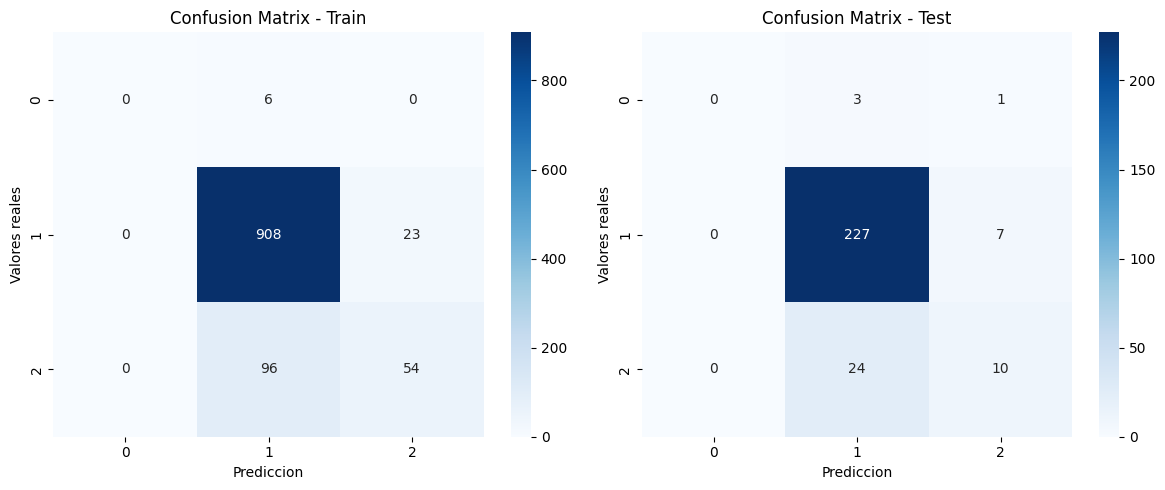

In [21]:
#Visualizacion del Confusion Matrix

# Configuramos las figuras
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión del train
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Train')
axes[0].set_xlabel('Prediccion')
axes[0].set_ylabel('Valores reales')

# Matriz de confusión del test
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test')
axes[1].set_xlabel('Prediccion')
axes[1].set_ylabel('Valores reales')

plt.tight_layout()
plt.show()

La diagonal de la matriz del train ve un buen aprendizaje, siendo 908 predicciones de vino de calidad media y 52 de alta calidad, pero en el test el rendimiento baja y solamente se predice 227 vinos de calidad media y 10 de alta calidad.

In [22]:
#Classification Report

# Reporte para el set de entrenamiento
print("Classification Report - Train:")
print(classification_report(y_train, y_pred_train))

# Reporte para el set de prueba
print("Classification Report - Test:")
print(classification_report(y_test, y_pred_test))

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.90      0.98      0.94       931
           2       0.70      0.36      0.48       150

    accuracy                           0.89      1087
   macro avg       0.53      0.45      0.47      1087
weighted avg       0.87      0.89      0.87      1087

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      0.97      0.93       234
           2       0.56      0.29      0.38        34

    accuracy                           0.87       272
   macro avg       0.48      0.42      0.44       272
weighted avg       0.84      0.87      0.85       272



In [ ]:
#Calcular importancia de cada variable por permutación, para determinar la calidad de vino segun KNN

resultados = permutation_importance(knn,X_test,y_test,n_repeats=10,random_state=42,scoring="accuracy")

importancias = pd.DataFrame({"variable": variables_numericas, "importancia_media": resultados.importances_mean,"importancia_std": resultados.importances_std})

importancias = importancias.sort_values("importancia_media", ascending=False)

print(importancias)

                variable  importancia_media  importancia_std
10               alcohol           0.030147         0.009559
6   total_sulfur_dioxide           0.024632         0.010274
0          fixed_acidity           0.021324         0.009559
5    free_sulfur_dioxide           0.016912         0.007747
3         residual_sugar           0.009926         0.006378
4              chlorides           0.000000         0.000000
7                density           0.000000         0.000000
9              sulphates           0.000000         0.000000
8                     pH          -0.001471         0.001801
2            citric_acid          -0.001838         0.002466
1       volatile_acidity          -0.002206         0.001801


De acuerdo a KNN, la varaible alcohol, total de diaxido sulfurico y fixed acidity son las variables de mayor importancia para determinar la calidad del vino. Sin embargo, el nivel de alcohol y fixed acidity son las variables mas relevantes y mas estables por tener una media alta y una desviacion estantar mas pequeña de las 3 viriables relevantes. 

k=1 Train Accuracy: 1.0000, Test Accuracy: 0.8309
k=2 Train Accuracy: 0.9255, Test Accuracy: 0.8566
k=3 Train Accuracy: 0.9236, Test Accuracy: 0.8713
k=4 Train Accuracy: 0.9025, Test Accuracy: 0.8787
k=5 Train Accuracy: 0.8997, Test Accuracy: 0.8713
k=6 Train Accuracy: 0.8841, Test Accuracy: 0.8750
k=7 Train Accuracy: 0.8832, Test Accuracy: 0.8860
k=8 Train Accuracy: 0.8832, Test Accuracy: 0.8824
k=9 Train Accuracy: 0.8758, Test Accuracy: 0.8971
k=10 Train Accuracy: 0.8776, Test Accuracy: 0.9081
k=11 Train Accuracy: 0.8767, Test Accuracy: 0.8971
k=12 Train Accuracy: 0.8767, Test Accuracy: 0.9118
k=13 Train Accuracy: 0.8740, Test Accuracy: 0.9007
k=14 Train Accuracy: 0.8749, Test Accuracy: 0.9044
k=15 Train Accuracy: 0.8740, Test Accuracy: 0.8824
k=16 Train Accuracy: 0.8721, Test Accuracy: 0.8860
k=17 Train Accuracy: 0.8712, Test Accuracy: 0.8897
k=18 Train Accuracy: 0.8721, Test Accuracy: 0.8934
k=19 Train Accuracy: 0.8703, Test Accuracy: 0.8971
k=20 Train Accuracy: 0.8666, Test Accura

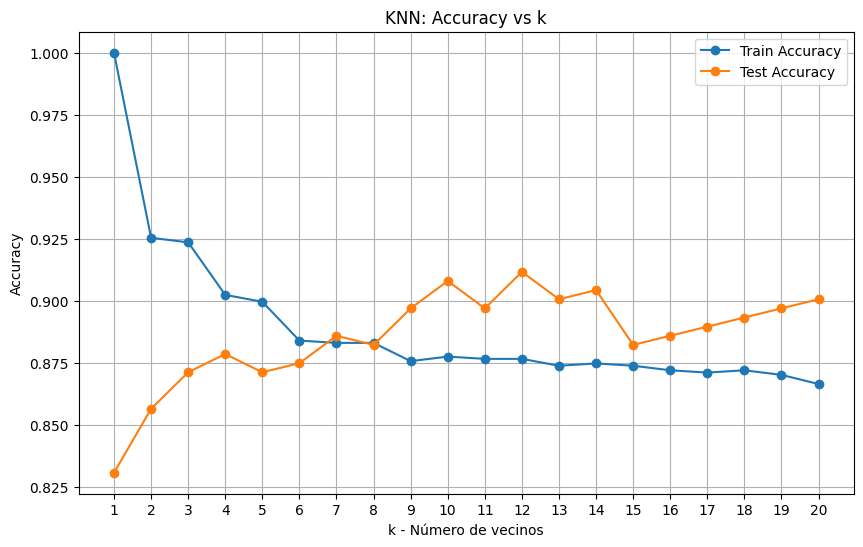

In [ ]:
#Diferentes valores de K

# Listas para guardar resultados
k_values = list(range(1, 21))  # k de 1 a 20
train_accuracies = [] #Lista para train
test_accuracies = [] #Lista para test

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_num_scal, y_train)  # Usamos las features escaladas
    y_pred_train = knn.predict(X_train_num_scal)
    y_pred_test = knn.predict(X_test_num_scal)
    
    train_accuracies.append(accuracy_score(y_train, y_pred_train)) # append agrega el nuevo valor a la lista
    test_accuracies.append(accuracy_score(y_test, y_pred_test))

# Mostrar resultados
for i, k in enumerate(k_values):
    print(f"k={k} Train Accuracy: {train_accuracies[i]:.4f}, Test Accuracy: {test_accuracies[i]:.4f}")

# Graficar accuracy vs k
plt.figure(figsize=(10,6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('k - Número de vecinos')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


De acuerdo a la prueba, un K = 12, es el mejor porque indica el test mas alto de 91.18%

FUNSION DE PREDICCION SOBRE LA CALIDAD DE UN VINO 

In [ ]:

variables_numericas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',	'pH', 'sulphates', 'alcohol'] #variables con outliers

def prediccion_calidad_vino():
    
    input_values = []

    print("Por favor ingresa los valores del vino según las siguientes características:\n")

    for var in variables_numericas:
        while True:
            try:
                value = float(input(f"{var}: "))
                input_values.append(value)
                break
            except ValueError:
                print("Por favor ingresa un número válido.")

    df = pd.DataFrame([input_values], columns=variables_numericas) #Conversion a dataframe
    df_scaled = scaler.transform(df) #Se escalan los datos ingresados
    pred_class = knn.predict(df_scaled)[0] #Predecir con KNN ya entrenado

    # Interpretación de la calidad
    if pred_class <= 3:
        return "Este vino probablemente sea de calidad baja 🍷"
    elif pred_class <= 6:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de calidad alta 🍷"
    
resultado = prediccion_calidad_vino()
print(resultado)

Por favor ingresa los valores del vino según las siguientes características:

Por favor ingresa un número válido.
Este vino probablemente sea de calidad baja 🍷
